### Notebook *NB04 – Comparación de resultados y análisis final*  
**Autor:** Jesús Daniel Romeral Cortina

**Objetivo:**  
Comparar el rendimiento de los distintos modelos predictivos entrenados con y sin variables de sentimiento, analizando el impacto de la incorporación del sentimiento sobre la capacidad predictiva en diferentes horizontes temporales.


In [1]:
import pandas as pd

df_res = pd.concat([
    pd.read_csv("../../resultados/resultados_ml_1d.csv"),
    pd.read_csv("../../resultados/resultados_ml_1d_SENT.csv"),
    pd.read_csv("../../resultados/resultados_ml_5d.csv"),
    pd.read_csv("../../resultados/resultados_ml_5d_SENT.csv"),
    pd.read_csv("../../resultados/resultados_lstm_1d.csv"),
    pd.read_csv("../../resultados/resultados_lstm_1d_SENT.csv"),
    pd.read_csv("../../resultados/resultados_lstm_5d.csv"),
    pd.read_csv("../../resultados/resultados_lstm_5d_SENT.csv"),
], ignore_index=True)

df_res

,Modelo,tipo:modelo,horizonte,usa_sentimiento,Acc,B_Acc,F1,ROC
0,Dummy_MostFreq,ML,1d,0,0.494485,0.500000,0.661747,0.500000
1,Logistic_Reg,ML,1d,0,0.503676,0.503981,0.514388,0.493180
2,Random_Forest,ML,1d,0,0.492647,0.497979,0.656716,0.493897
3,Hist_GB,ML,1d,0,0.500000,0.504481,0.643045,0.518790
4,Dummy_MostFreq,ML,1d,1,0.494485,0.500000,0.661747,0.500000
5,Logistic_Reg,ML,1d,1,0.494485,0.495012,0.514991,0.493924
6,Random_Forest,ML,1d,1,0.490809,0.496283,0.658446,0.484975
7,Hist_GB,ML,1d,1,0.501838,0.505934,0.635262,0.507394
8,Dummy_MostFreq,ML,5d,0,0.556985,0.500000,0.715466,0.500000
9,Logistic_Reg,ML,5d,0,0.522059,0.517467,0.565217,0.517303


In [3]:
df_res.sort_values(
    by=["usa_sentimiento", "tipo:modelo", "horizonte", "ROC"],
    ascending=[True, True, True, False]
)


,Modelo,tipo:modelo,horizonte,usa_sentimiento,Acc,B_Acc,F1,ROC
16,LSTM,LSTM,1d,0,0.496255,0.497980,0.654685,0.489732
18,LSTM,LSTM,5d,0,0.573034,0.509620,0.724638,0.506437
3,Hist_GB,ML,1d,0,0.500000,0.504481,0.643045,0.518790
0,Dummy_MostFreq,ML,1d,0,0.494485,0.500000,0.661747,0.500000
2,Random_Forest,ML,1d,0,0.492647,0.497979,0.656716,0.493897
1,Logistic_Reg,ML,1d,0,0.503676,0.503981,0.514388,0.493180
9,Logistic_Reg,ML,5d,0,0.522059,0.517467,0.565217,0.517303
8,Dummy_MostFreq,ML,5d,0,0.556985,0.500000,0.715466,0.500000
10,Random_Forest,ML,5d,0,0.555147,0.498774,0.713270,0.463936
11,Hist_GB,ML,5d,0,0.555147,0.499623,0.711905,0.463820


In [4]:
df_res.groupby(
    ["tipo:modelo", "horizonte", "usa_sentimiento"]
)[["Acc", "B_Acc", "F1", "ROC"]].mean().reset_index()


,tipo:modelo,horizonte,usa_sentimiento,Acc,B_Acc,F1,ROC
0,LSTM,1d,0,0.496255,0.497980,0.654685,0.489732
1,LSTM,1d,1,0.498127,0.499902,0.659033,0.544874
2,LSTM,5d,0,0.573034,0.509620,0.724638,0.506437
3,LSTM,5d,1,0.565543,0.500000,0.722488,0.587463
4,ML,1d,0,0.497702,0.501610,0.618974,0.501467
5,ML,1d,1,0.495404,0.499307,0.617612,0.496573
6,ML,5d,0,0.547335,0.503966,0.676465,0.486265
7,ML,5d,1,0.557904,0.505495,0.708395,0.495938


In [6]:
pivot = df_res.pivot_table(
    index=["tipo:modelo", "horizonte", "Modelo"],
    columns="usa_sentimiento",
    values="ROC"
).reset_index()

pivot["delta_ROC"] = pivot[1] - pivot[0]
pivot


usa_sentimiento,tipo:modelo,horizonte,Modelo,0,1,delta_ROC
0,LSTM,1d,LSTM,0.489732,0.544874,0.055143
1,LSTM,5d,LSTM,0.506437,0.587463,0.081026
2,ML,1d,Dummy_MostFreq,0.500000,0.500000,0.000000
3,ML,1d,Hist_GB,0.518790,0.507394,-0.011396
4,ML,1d,Logistic_Reg,0.493180,0.493924,0.000743
5,ML,1d,Random_Forest,0.493897,0.484975,-0.008922
6,ML,5d,Dummy_MostFreq,0.500000,0.500000,0.000000
7,ML,5d,Hist_GB,0.463820,0.472741,0.008922
8,ML,5d,Logistic_Reg,0.517303,0.565562,0.048259
9,ML,5d,Random_Forest,0.463936,0.445449,-0.018487


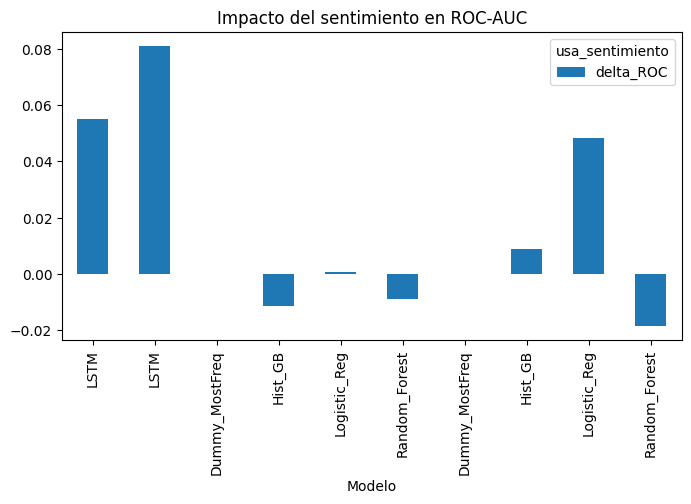

In [7]:
import matplotlib.pyplot as plt

pivot.plot(
    x="Modelo",
    y=["delta_ROC"],
    kind="bar",
    figsize=(8,4),
    title="Impacto del sentimiento en ROC-AUC"
)
plt.show()
